In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
train = pd.read_csv('C:/Users/Ashwini/Desktop/Train.csv')
test = pd.read_csv('C:/Users/Ashwini/Desktop/Test.csv')

In [3]:
#concate 
train['source'] = 'train'
test['source'] = 'test'
test['Item_Outlet_Sales'] = 0
data = pd.concat([train,test],sort=False)

In [4]:
data.shape

(14204, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

In [6]:
data['Item_Outlet_Sales'].describe()

count    14204.000000
mean      1308.865489
std       1699.791423
min          0.000000
25%          0.000000
50%        559.272000
75%       2163.184200
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_5516\2871521736.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Item_Outlet_Sales'])


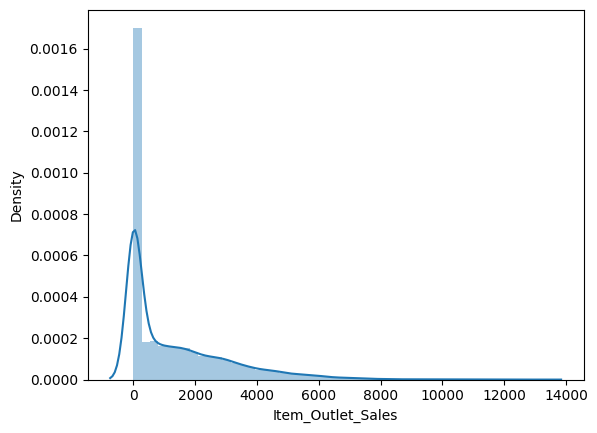

In [7]:
import seaborn as sns
sns.distplot(data['Item_Outlet_Sales'])
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usage: 1.5

In [10]:
num_var = data.select_dtypes(include=[np.float64])
num_var.shape

(14204, 4)

In [12]:
num_var.isnull().sum()

Item_Weight          2439
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
dtype: int64

In [13]:
data.apply(lambda x : len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

<Axes: title={'center': 'Item_Outlet_Sales'}, xlabel='Item_Fat_Content'>

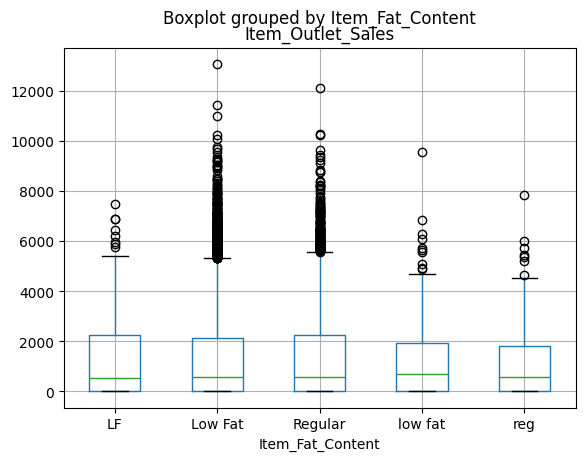

In [14]:
data.boxplot(column='Item_Outlet_Sales',by='Item_Fat_Content')

In [15]:
for var in num_var:
    mean = np.around(np.mean(data[var]))
    data[var].fillna(mean,inplace = True)

In [16]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
source                          0
dtype: int64

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_5516\3222566373.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Outlet_Type' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


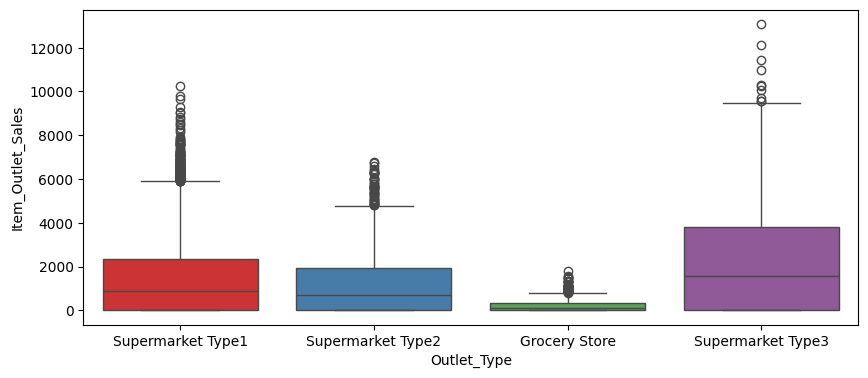

In [18]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Type' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


In [19]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])

In [20]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'food','NC':'Non_consum','DR':'Drink'})
data['Item_Type_Combined'].value_counts()

Item_Type_Combined
food          10201
Non_consum     2686
Drink          1317
Name: count, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14204 entries, 0 to 5680
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          14204 non-null  float64
 12  source                     14204 non-null  object 
 13  Item_Type_Combined         14204 non-null  object 
d

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_5516\3447056340.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


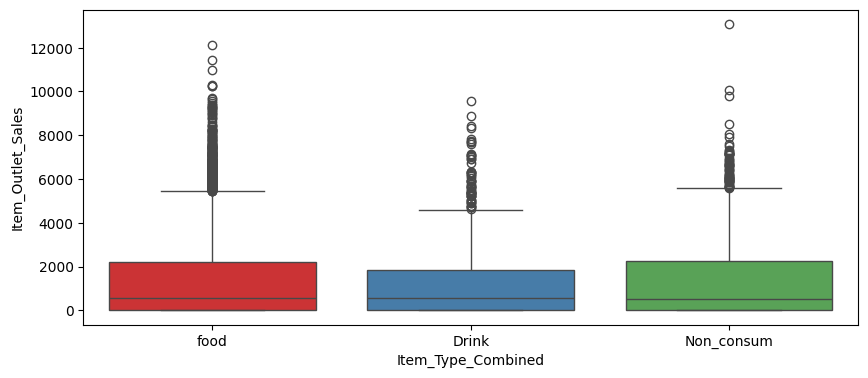

In [22]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Item_Type_Combined' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

In [23]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

In [24]:
data['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_5516\1314669779.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


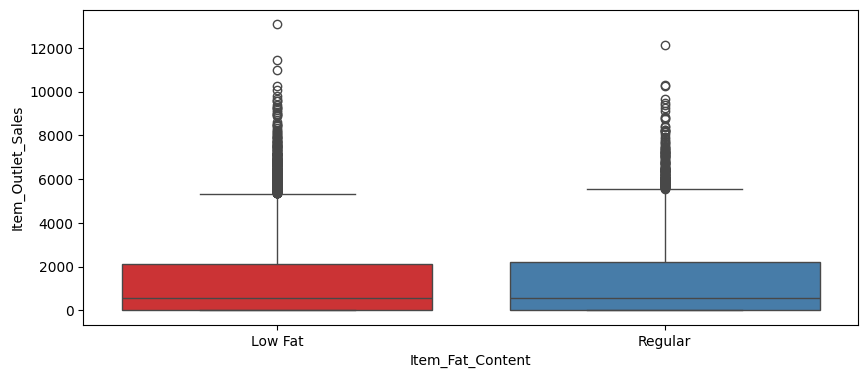

In [25]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Item_Fat_Content' ,y='Item_Outlet_Sales',data=data,palette="Set1" )

<Axes: xlabel='Outlet_Establishment_Year'>

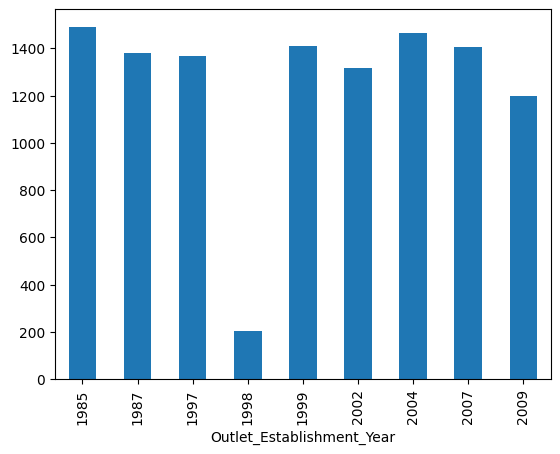

In [26]:
data.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()

In [27]:
data['Outlet_Establishment_Year'].describe()

count    14204.000000
mean      1997.830681
std          8.371664
min       1985.000000
25%       1987.000000
50%       1999.000000
75%       2004.000000
max       2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [28]:
data['Outlet_Year'] = 2019 - data['Outlet_Establishment_Year']
data['Outlet_Year'].describe()

count    14204.000000
mean        21.169319
std          8.371664
min         10.000000
25%         15.000000
50%         20.000000
75%         32.000000
max         34.000000
Name: Outlet_Year, dtype: float64

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_5516\1417459509.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x ='Outlet_Year' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


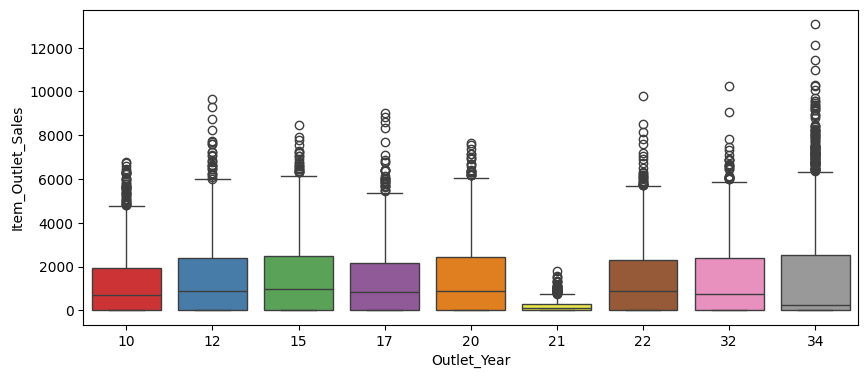

In [30]:
plt.figure(figsize=(10,9))
plt.subplot(212)

ax = sns.boxplot(x ='Outlet_Year' ,y='Item_Outlet_Sales',data=data,palette="Set1" )


In [31]:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

In [32]:
train.shape , test.shape

((8523, 15), (5681, 15))